In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('/content/Loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(614, 13)

In [6]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
data=data.dropna()

In [9]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: xlabel='Education', ylabel='count'>

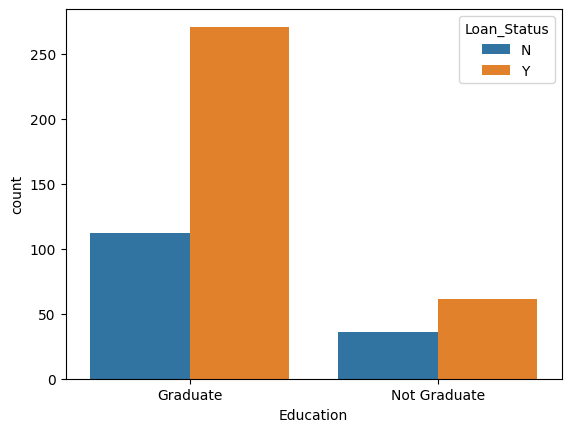

In [11]:
#data plotting
sns.countplot(x='Education',hue='Loan_Status',data=data)

<Axes: xlabel='Self_Employed', ylabel='count'>

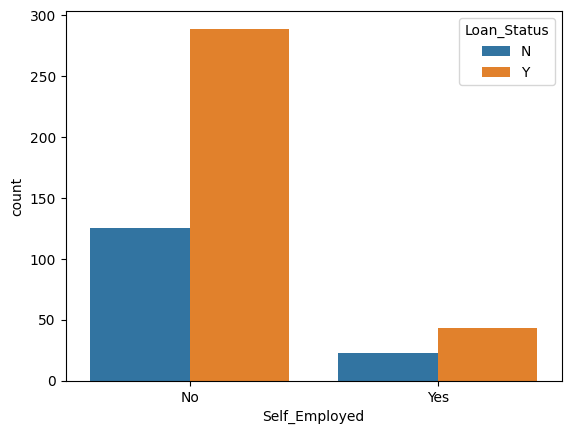

In [16]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)

<Axes: xlabel='Married', ylabel='count'>

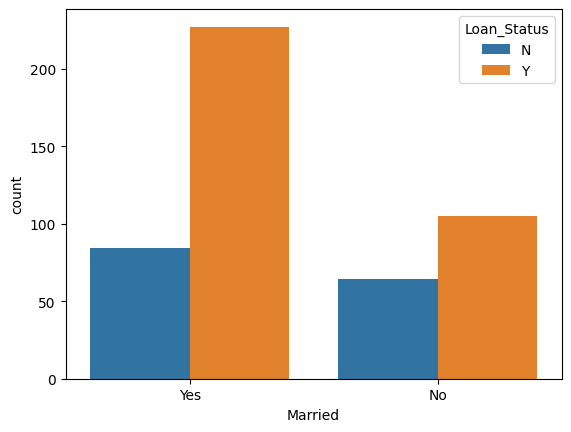

In [17]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

In [53]:
data=data.replace({'Gender':{'Male':1,'Female':0}})
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1


In [54]:
data=data.replace({'Married':{'Yes':1,'No':0}})
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1


In [56]:
data=data.replace({'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2},'Loan_Status':{'N':0,'Y':1},'Dependents':{'3+':3}})
data

<ipython-input-56-f817f41fc0a0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace({'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2},'Loan_Status':{'N':0,'Y':1},'Dependents':{'3+':3}})


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [57]:
#done with the preprocessing we drop the Loan_ID
#data=data.drop(columns=['Loan_ID'],axis=1)

In [58]:
x=data.drop(columns=['Loan_Status'],axis=1)
y=data['Loan_Status']

In [59]:
#splitting the datasets among Training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [60]:

print(x_train.shape)
print(x_test.shape)


(432, 11)
(48, 11)


In [61]:
#making model
model=svm.SVC(kernel='linear')

In [62]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [63]:
prediction=model.predict(x_train)

In [64]:
accuracy_score(prediction,y_train)

0.7824074074074074